# Role of Machine Learning in Predicting Diabetes
- Final Project
- BTM 710
- Saleh Babaei
- 2024-11-30

## Loading Required Libraries

In [24]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
import kagglehub
import os

## Loading The Dataset

In [4]:
# Download latest version of the dataset from Kaggle
path = kagglehub.dataset_download("nanditapore/healthcare-diabetes")
print("Path to dataset files:", path)

# List all files in the downloaded directory
dataset_files = os.listdir(path)
print("Files in the dataset:", dataset_files)

# Load the first CSV file (assuming the dataset contains CSV files)
csv_file = [file for file in dataset_files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

Path to dataset files: /root/.cache/kagglehub/datasets/nanditapore/healthcare-diabetes/versions/1
Files in the dataset: ['Healthcare-Diabetes.csv']


In [3]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## Data Preprocessing

In [6]:
# 1. Handle missing values (if any)
df.fillna(df.median(), inplace=True)

In [7]:
# 2. Separate features and target variable
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with the actual column name for the target variable
y = df['Outcome']

In [8]:
# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training

In [13]:
# Models initialization
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')


In [14]:
# Train and evaluate models
results = []

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Test predictions

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "CV Mean Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    print(f"Results for {name}:\n"
          f"Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")

Results for Logistic Regression:
Test Accuracy: 0.7726, Precision: 0.7293, Recall: 0.5187, F1-Score: 0.6062

Results for Decision Tree:
Test Accuracy: 0.9621, Precision: 0.9560, Recall: 0.9305, F1-Score: 0.9431

Results for XGBoost:
Test Accuracy: 0.9819, Precision: 0.9836, Recall: 0.9626, F1-Score: 0.9730



In [15]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

In [16]:
# Display the results
print("Model Comparison:")
print(results_df)

Model Comparison:
                 Model  CV Mean Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression          0.779125       0.772563   0.729323  0.518717   
1        Decision Tree          0.966127       0.962094   0.956044  0.930481   
2              XGBoost          0.979222       0.981949   0.983607  0.962567   

   F1-Score  
0  0.606250  
1  0.943089  
2  0.972973  


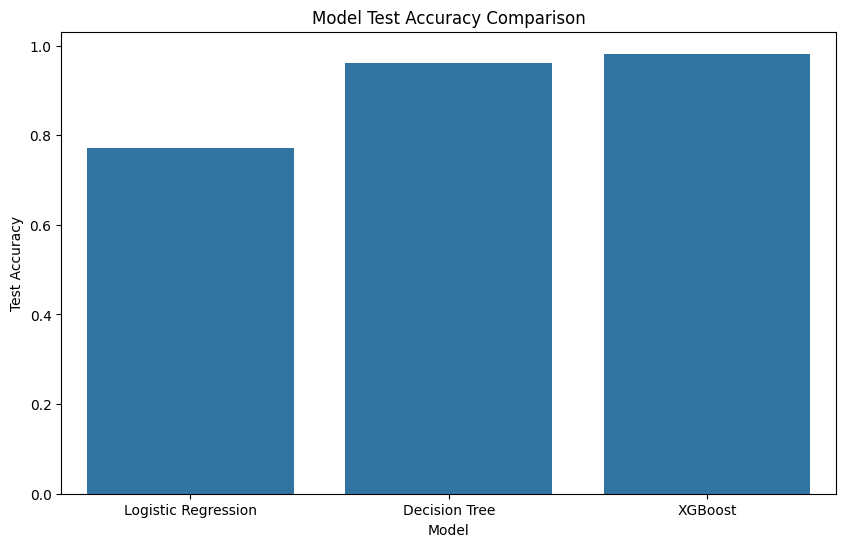

In [17]:
# Visualization of results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.show()

### XGBoost outperformed other models

## Model Evaluation

In [25]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

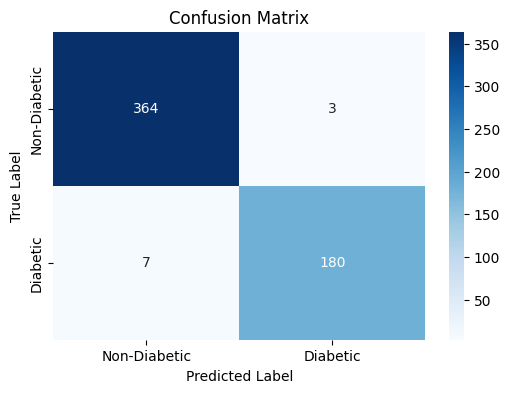

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.98      0.99      0.99       367
    Diabetic       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



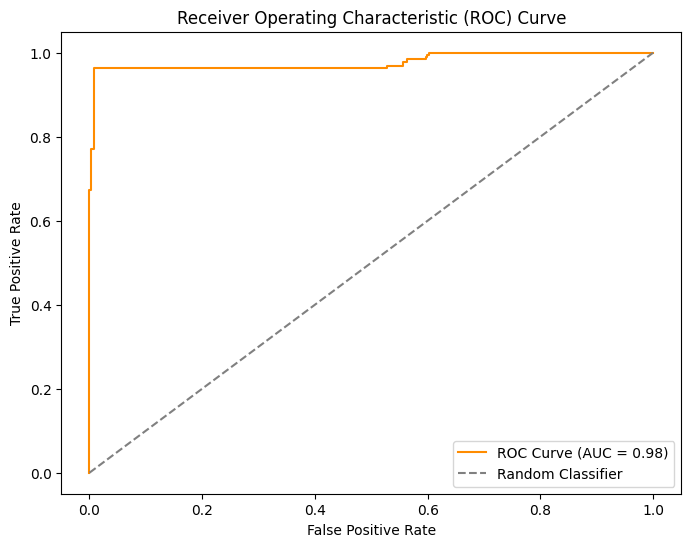

ROC-AUC Score: 0.9768


In [30]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Print the AUC value
print(f"ROC-AUC Score: {roc_auc:.4f}")

## Extract and Visualize Feature Importance

Feature Importance:
                    Feature  Importance
2                   Glucose    0.238048
6                       BMI    0.152446
8                       Age    0.142316
4             SkinThickness    0.101065
1               Pregnancies    0.094482
5                   Insulin    0.088174
7  DiabetesPedigreeFunction    0.084797
3             BloodPressure    0.078454
0                        Id    0.020219


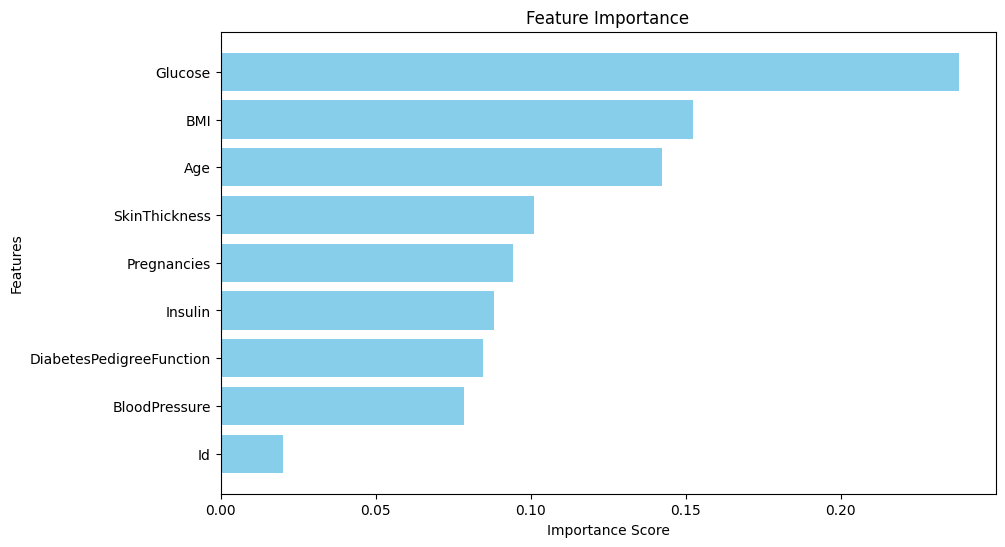

In [22]:
# Access the trained XGBoost model
xgb_model = models['XGBoost']

# Extract feature importances
feature_importance = xgb_model.feature_importances_

# Map feature importance to feature names
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Print feature importance
print("Feature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

## Correlation Matrix

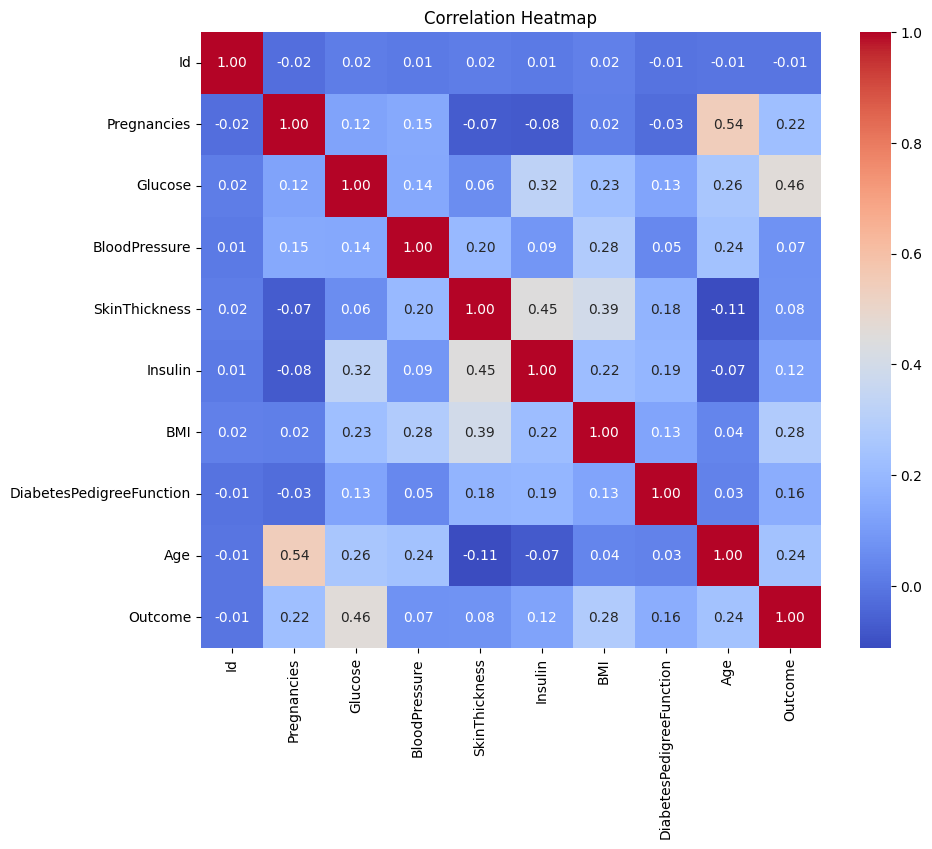

In [23]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()